## Experiment 10
### Write a Python program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

Decision Tree Classifier Results:
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777


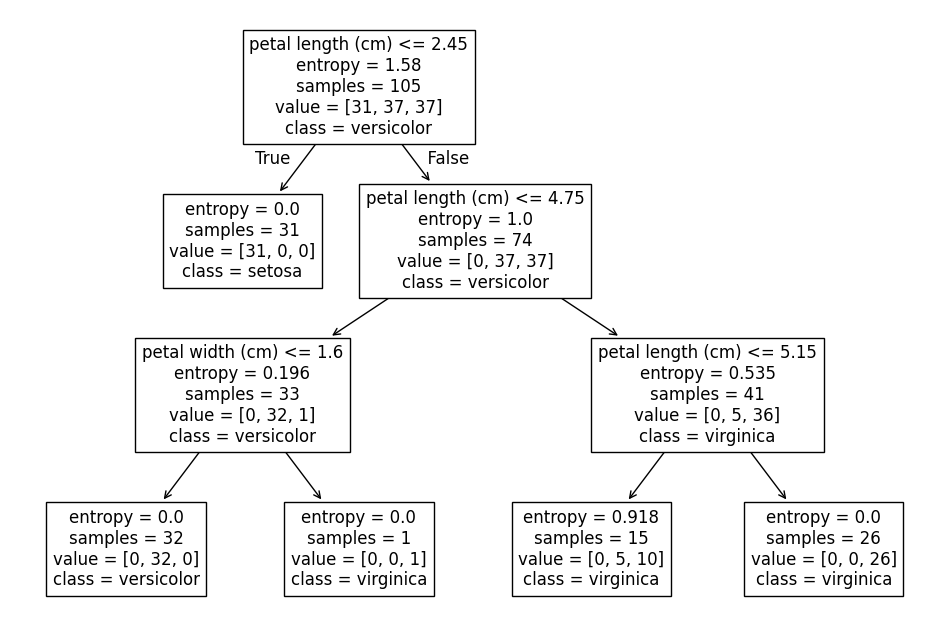

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

iris = load_iris()
# Define features and target
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtc = dtc.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
precision_dtc = metrics.precision_score(y_test, y_pred_dtc, average='weighted')
recall_dtc = metrics.recall_score(y_test, y_pred_dtc, average='weighted')

# Print the results
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_dtc)
print("Precision:", precision_dtc)
print("Recall:", recall_dtc)

plt.figure(figsize=(12, 8))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=False)
plt.show()

## Prediction for a New data

In [ ]:
print("\nEnter new data for prediction\n")

sl = float(input('Enter sepal Length: '))
sw = float(input('Enter sepal Width: '))
pl = float(input('Enter petal Length: '))
pw = float(input('Enter petal Width: '))

# Make a prediction on the new input data
new_data = [[sl, sw, pl, pw]]
new_prediction = dtc.predict(new_data)
print("Predicted class:", new_prediction[0])


# Following Cells are not required for the Experiment

## Feature Importance Plot:

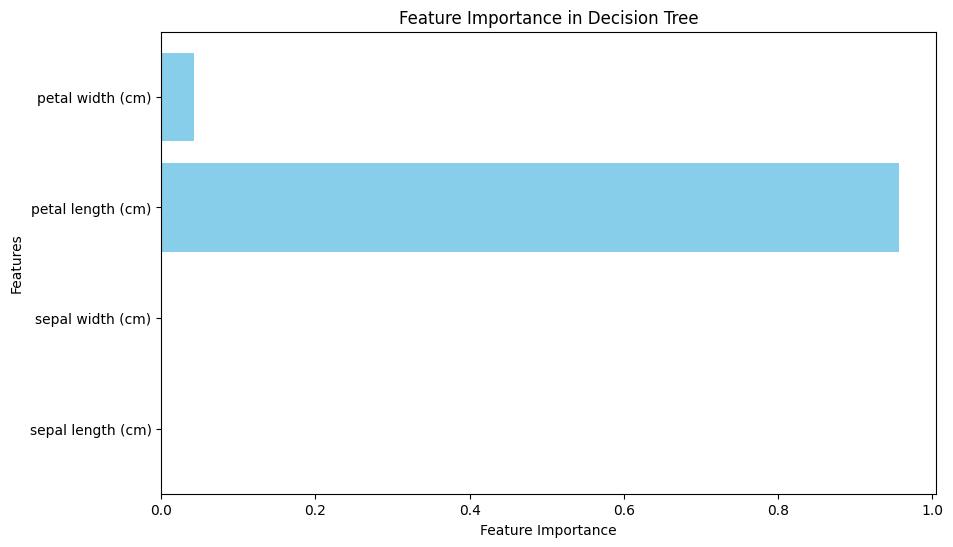

In [8]:
importances = dtc.feature_importances_
feature_names = iris.feature_names
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

## Confusion Matrix

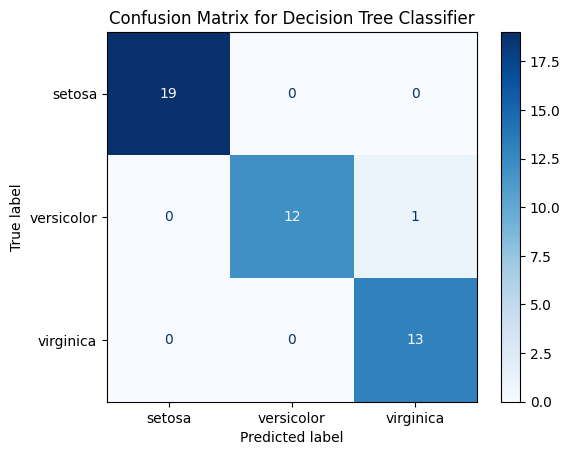

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

## ROC Curve and AUC (for each class)

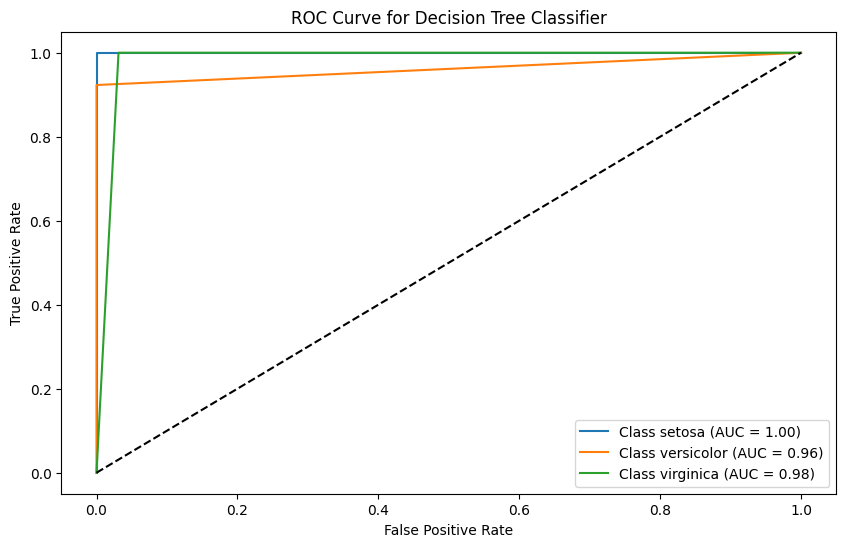

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_dtc_bin = label_binarize(y_pred_dtc, classes=[0, 1, 2])

plt.figure(figsize=(10, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_dtc_bin[:, i])
    plt.plot(fpr, tpr, label=f'Class {iris.target_names[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend(loc="best")
plt.show()